<a href="https://colab.research.google.com/github/LTayrone/Operations-_Research/blob/main/Programacao_linear_semana02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Resolução do Problema de Programação Linear
# Universidade Federal do Parana
# Aluno: Lucas Tayrone Moreira

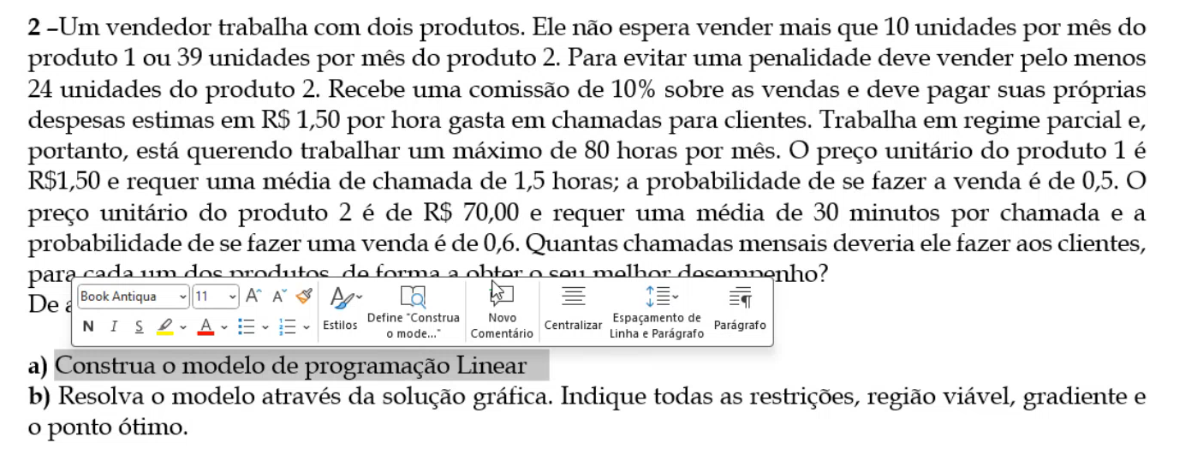

In [26]:
# pip install vai instalar uma biblioteca específica
!pip install gurobipy

In [27]:
# Importando as bibliotecas

import gurobipy as gp
from gurobipy import GRB

In [12]:
model = gp.Model("Produto")

Restricted license - for non-production use only - expires 2025-11-24


In [28]:
# Create decision variables for the foods to buy

produto1 = model.addVar(vtype=GRB.CONTINUOUS, name="x1")
produto2 = model.addVar(vtype=GRB.CONTINUOUS, name="x2")
tempo = model.addVar(vtype=GRB.CONTINUOUS, name="t")

In [29]:
# Restrições

model.addConstr(produto1 <= 10) # Não vende mais que 10 unidades do produto 1
model.addConstr(produto2 <= 39) # Não vende mais que 39 unidades do produto 2
model.addConstr(produto2 >= 24) # Venda pelo menos 24 unidades do produto 2
model.addConstr(tempo <= 80) # Não trabalhe mais de 80 horas mês
model.addConstr((produto1 * 1.5 * 0.5) + (produto2 * 0.5 * 0.6) <= tempo) # Não trabalhe mais de 80 horas mês


<gurobi.Constr *Awaiting Model Update*>

In [30]:
# Objetivo
model.setObjective(0.1 * ((1.5 * produto1) + (70 * produto2)) - 1.5 * tempo, GRB.MAXIMIZE) # Recebe uma comissão de 10% sobre as vendas, produto 1 preço R$1,5 , produto 2 R$70,0, despesa de R$1,50 por hora

In [31]:
# Solve
model.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 14 rows, 8 columns and 18 nonzeros
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e-01, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 8e+01]
LP warm-start: use basis
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.1500000e+30   3.050000e+30   7.150000e+00      0s
       2    2.5545000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.554500000e+02


In [35]:
if model.status == GRB.OPTIMAL:
  print(f"\nLucro: {model.ObjVal:g}")
  print(f'A quantidade de chamadas produto 1: {produto1.X}')
  print(f'A quantidade de chamadas produto 2: {produto2.X}')
else:
  print("No solution")


Lucro: 255.45
A quantidade de chamadas produto 1: 0.0
A quantidade de chamadas produto 2: 39.0
